Total number of images: 1059129
Number of images that have positive annotation: 8827
Number of image that have a negative annotation: 1050302


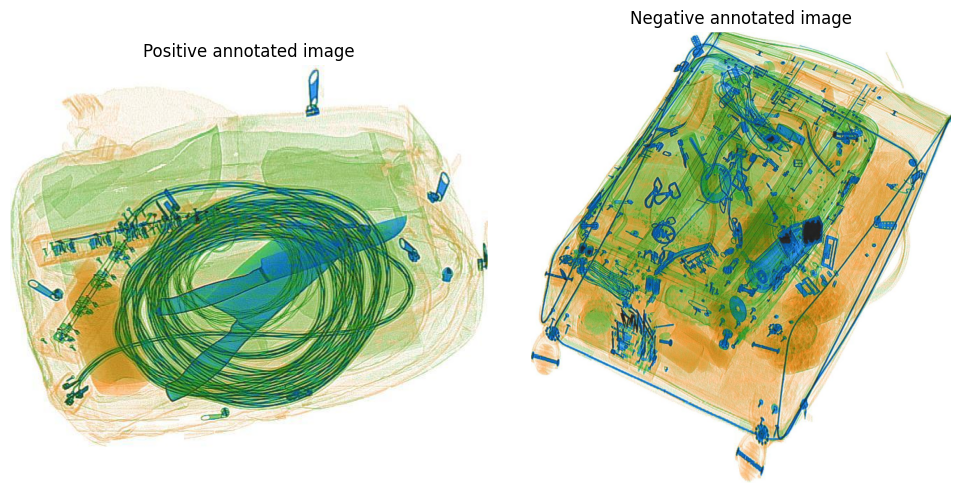

In [3]:
"""
Link for downloading the dataset: https://github.com/MeioJane/SIXray
Loading the SIXRay dataset, the 8929 positive annotations in XML format in the folder positive annotation -> annotations
"""
import os
from PIL import Image
import matplotlib.pyplot as plt

# Path to the folder JPEGImage
path = 'dataset/dataset/JPEGImage'

count_P = 0
count_N = 0

img_pos = None
img_neg = None

# Counting the files starting with 'P' and 'N' (positive and negative)
for filename in os.listdir(path):
    if filename.startswith('P'):
        count_P += 1
        if img_pos is None:
            img_pos = Image.open(os.path.join(path, filename))
    elif filename.startswith('N'):
        count_N += 1
        if img_neg is None:
            img_neg = Image.open(os.path.join(path, filename))

# Showing number of positive and negative instances in the dataset
print(f"Total number of images: {count_N + count_P}")
print(f"Number of images that have positive annotation: {count_P}")
print(f"Number of image that have a negative annotation: {count_N}")

# Showing some images, one positive and one negative
if img_pos and img_neg:
    fig, axs = plt.subplots(1, 2, figsize=(10,5))
    axs[0].imshow(img_pos)
    axs[0].set_title("Positive annotated image")
    axs[0].axis('off')

    axs[1].imshow(img_neg)
    axs[1].set_title("Negative annotated image")
    axs[1].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("Images not found")


In [5]:
"""
Extracting in a new folder the SIXRay10 subset, which contains around ~90k images, of which ~9k are positives, and the relative annotations (in XML format)
"""
import pandas as pd
import shutil
from pathlib import Path

train_csv = Path("dataset/ImageSet/ImageSet/10/train.csv")
test_csv = Path("dataset/ImageSet/ImageSet/10/test.csv")
jpeg_image_dir = Path("dataset/dataset/JPEGImage")
annotations_dir = Path("dataset/positive-Annotation/Annotation")
output_dir = Path("subset")


def copy_subset(csv_path, subset_name):
    df = pd.read_csv(csv_path)
    names = df['name'].tolist()

    # Creating output directories
    image_output_dir = output_dir / subset_name / "images"
    anno_output_dir = output_dir / subset_name / "annotations"
    image_output_dir.mkdir(parents=True, exist_ok=True)
    anno_output_dir.mkdir(parents=True, exist_ok=True)

    missing_img = 0
    copied = 0

    for name in names:
        jpg_file = jpeg_image_dir / f"{name}.jpg"
        xml_file = annotations_dir / f"{name}.xml"

        if jpg_file.exists():
            shutil.copy(jpg_file, image_output_dir / f"{name}.jpg")
            copied += 1
        else:
            missing_img += 1

        if xml_file.exists():
            shutil.copy(xml_file, anno_output_dir / f"{name}.xml")

    return copied, missing_img


if __name__ == "__main__":

    train_copied, train_missing_img = copy_subset(train_csv, "train")
    test_copied, test_missing_img = copy_subset(test_csv, "test")

    print("Subset created!")
    print(f"TRAIN - Copied images: {train_copied}, missing images: {train_missing_img}")
    print(f"TEST - Copied images: {test_copied}, missing images: {test_missing_img}")


Subset created!
TRAIN - Copied images: 74960, missing images: 0
TEST - Copied images: 13310, missing images: 102
